In [1]:
import tensorflow as tf

In [2]:
# Code to utilize the GPU for the session?
# Or at least acode to check if tf-gpu works
# sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [3]:
tf.__version__

'1.14.0'

In [4]:
tf.test.is_gpu_available()

True

In [5]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [15]:
from tensorflow import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.utils import to_categorical
from tensorflow.python.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [28]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [29]:
print(train_data.shape)
print(test_data.shape)

(60000, 28, 28)
(10000, 28, 28)


In [30]:
test_data.shape

(10000, 28, 28)

In [31]:
print(train_labels.shape)
print(test_labels.shape)

(60000,)
(10000,)


In [32]:
train_images = train_data.reshape((60000, 28*28)).astype('float32') / 255
test_images = test_data.reshape((10000, 28*28)).astype('float32') / 255

In [33]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [34]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [35]:
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [17]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

W0826 22:43:35.675154 12416 deprecation.py:506] From D:\ProgramData\Anaconda3\envs\TensorFlow-3.6\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Optimizer: Cost Function, Loss: Categorical Loss Function, Metrics: Measure
model.compile(optimizer='rmsprop', loss='categorical_crossentropy' ,metrics=['acc'])

In [38]:
# Save the model history
model_history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0405 - acc: 0.9880
Epoch 2/5
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0324 - acc: 0.9903
Epoch 3/5
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0267 - acc: 0.9926
Epoch 4/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0220 - acc: 0.9935
Epoch 5/5
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0174 - acc: 0.99510s - loss: 0.015


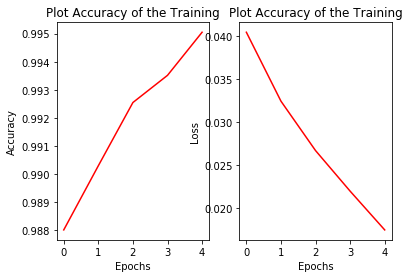

In [41]:
# Plot of Model Training History
epochs = 5
train_acc = model_history.history['acc']
train_loss = model_history.history['loss']

plt.subplot(1,2,1)
plt.plot(range(epochs), train_acc, 'r', label='Accuracy')
plt.title('Plot Accuracy of the Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs), train_loss, 'r', label='Accuracy')
plt.title('Plot Accuracy of the Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [36]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 58us/sample - loss: 0.0785 - acc: 0.9766


In [37]:
print(test_loss)
print(test_accuracy)

0.07848255945844576
0.9766
